# Logistic Regression

In this notebook, we compare our Linear Regression model built from scratch with the Logistic Regression model from Scikit-learn.

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
# read and print the data
data = pd.read_csv("../datasets/adult_data.csv", sep=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [3]:
# Cost function
cost = pd.read_csv('../datasets/cost.txt',header=None)

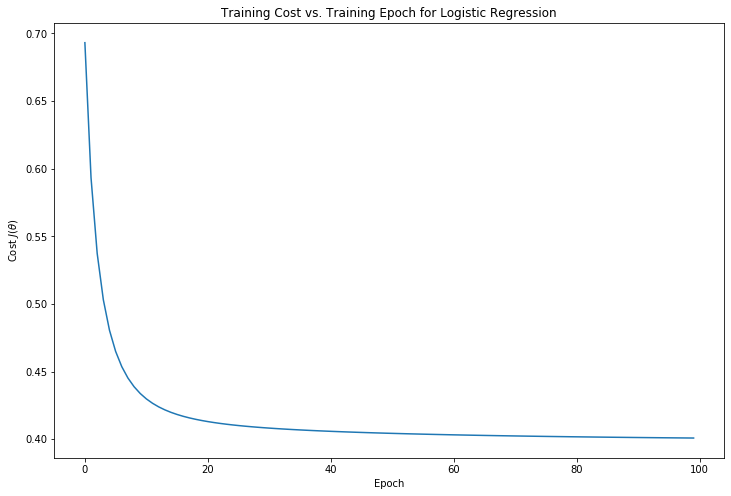

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("Epoch")
ax.set_ylabel(r"Cost $J(\theta)$")
ax.plot(cost)
ax.set_title("Training Cost vs. Training Epoch for Logistic Regression")
plt.show()

In [5]:
#Compare agains Scikit-Learn
X = data.iloc[:,0:14]
y = data.iloc[:,14]

mean_data = X.mean()
std_data = X.std()
X = ((X-mean_data)/std_data)

print("Data shape: " + str(X.shape))
print("Labels shape: " + str(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Train Data shape: " + str(X_train.shape))
print("Train Labels shape: " + str(y_train.shape))
print("Evaluation Data shape: " + str(X_test.shape))
print("Evaluation Labels shape: " + str(y_test.shape))

Data shape: (30162, 14)
Labels shape: (30162,)
Train Data shape: (24129, 14)
Train Labels shape: (24129,)
Evaluation Data shape: (6033, 14)
Evaluation Labels shape: (6033,)


In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
4121,0.195064,-1.186736,-1.514693,0.452728,-0.047573,-0.061649,0.694713,-0.365906,-0.345855,-0.692795,0.529410,-0.218582,2.426444,-0.239234
28424,0.042795,-0.116971,-0.127917,-0.984145,1.128900,0.759667,0.111996,-1.064240,-0.345855,1.443381,-0.147442,-0.218582,-0.077733,-0.239234
27744,-1.175356,-0.116971,-1.248387,0.452728,-0.047573,-0.882966,0.694713,-1.064240,-0.345855,-0.692795,-0.147442,-0.218582,-0.912458,-0.239234
25650,-1.099221,-0.116971,0.124608,1.602227,0.344584,-0.882966,-1.344798,-1.064240,-0.345855,1.443381,-0.147442,-0.218582,-0.077733,-0.239234
25282,-0.946952,-0.116971,1.026295,-0.696771,-0.439731,-0.061649,-1.344798,-0.365906,-0.345855,-0.692795,-0.147442,-0.218582,0.339630,-0.239234


In [7]:
logisticRegr = LogisticRegression(solver='lbfgs')

In [8]:
logisticRegr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
pred_train = logisticRegr.predict(X_train)

In [10]:
pred_test = logisticRegr.predict(X_test)

In [11]:
print("Train Accuracy: ", 100 - np.mean(np.abs(pred_train - y_train)) * 100)

Train Accuracy:  82.1293878735132


In [12]:
print("Test Accuracy: ", 100 - np.mean(np.abs(pred_test - y_test)) * 100)

Test Accuracy:  81.63434443891927


Perfect!